#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data loading

### Subtask:
Load the AAPL stock data from the "AAPL.csv" file into a pandas DataFrame.


**Reasoning**:
Load the AAPL stock data from the provided CSV file into a pandas DataFrame and display the first few rows to verify the load.



In [2]:
df=pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


## Data exploration

### Subtask:
Explore the loaded AAPL stock data to understand its characteristics.


**Reasoning**:
I need to check the shape, data types, descriptive statistics, and missing values of the DataFrame `df`.



In [3]:
# Check the shape of the DataFrame.
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (2011, 7)


In [4]:
# Examine the data types of each column.
print("\nData types of each column:\n", df.dtypes)


Data types of each column:
 Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [5]:
# Generate descriptive statistics for numerical features.
print("\nDescriptive statistics for numerical features:\n", df.describe())


Descriptive statistics for numerical features:
               Open         High          Low        Close    Adj Close  \
count  2011.000000  2011.000000  2011.000000  2011.000000  2011.000000   
mean    126.707469   127.827594   125.580258   126.741235   119.505548   
std      50.483753    50.926301    50.124940    50.578369    52.438444   
min      55.424286    57.085712    55.014286    55.790001    48.921928   
25%      85.882858    86.717858    85.056427    86.202145    75.056679   
50%     113.050003   114.190002   111.870003   113.050003   105.222908   
75%     165.190002   167.409996   163.424995   165.245002   160.047111   
max     291.119995   293.970001   288.119995   291.519989   289.522614   

             Volume  
count  2.011000e+03  
mean   5.949670e+07  
std    4.683856e+07  
min    1.136200e+07  
25%    2.758565e+07  
50%    4.346900e+07  
75%    7.471030e+07  
max    3.765300e+08  


In [6]:
# Identify missing values.
print("\nNumber of missing values in each column:\n", df.isnull().sum())
print("\nDataFrame info:\n")
df.info()


Number of missing values in each column:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

DataFrame info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


## Data visualization

### Subtask:
Visualize the distributions of numerical features in the AAPL stock dataset using histograms and identify potential outliers using box plots.


**Reasoning**:
Visualize the distributions of numerical features using histograms and box plots.



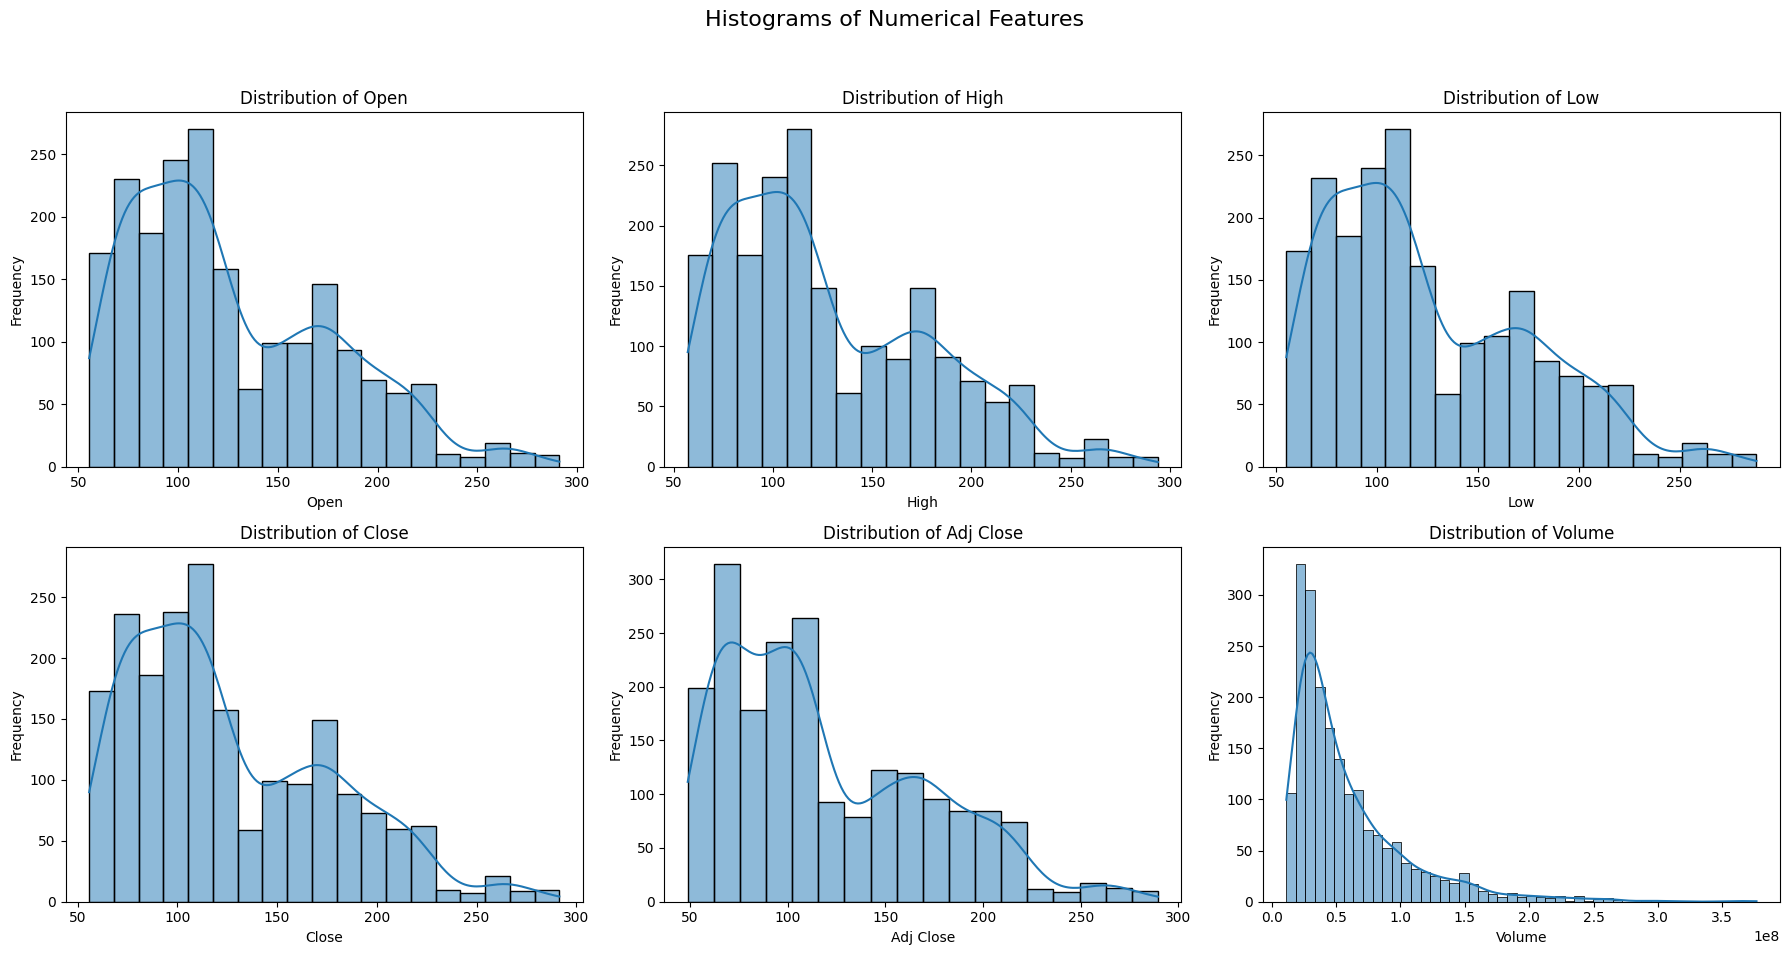

In [7]:
numerical_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
num_plots = len(numerical_features)

# Create subplots for histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Histograms of Numerical Features', fontsize=16)
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

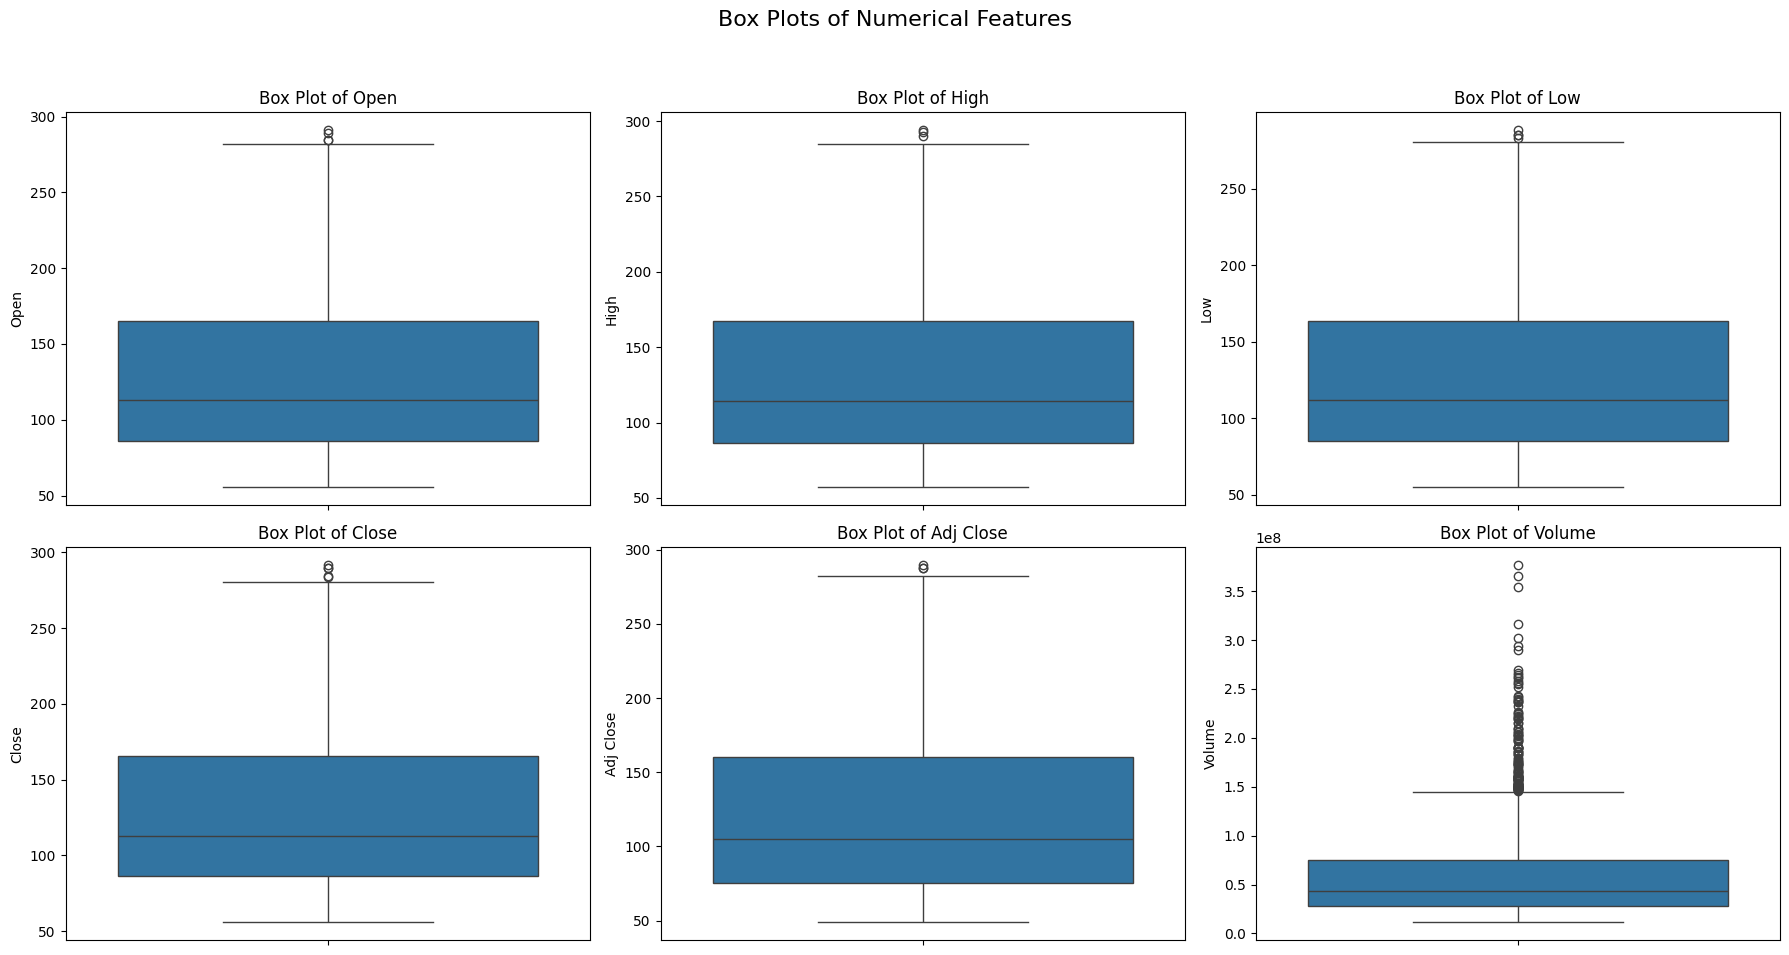

In [8]:
# Create subplots for box plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Box Plots of Numerical Features', fontsize=16)
axes = axes.ravel()
for i, feature in enumerate(numerical_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_ylabel(feature)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Data visualization

### Subtask:
Visualize trends in the time series data, specifically the closing price of AAPL stock over time.


**Reasoning**:
Convert the 'Date' column to datetime objects and create a line plot of the 'Close' price over time.



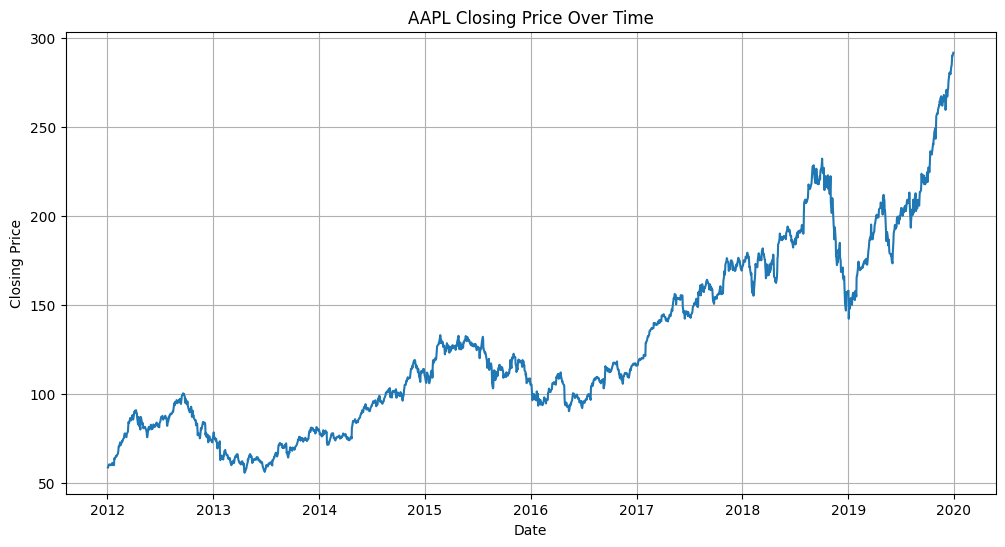

In [9]:
# Convert the 'Date' column to datetime objects.
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Create the line plot.
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('AAPL Closing Price Over Time')
plt.grid(True)
plt.show()

## Data analysis

### Subtask:
Calculate the correlation between numerical features in the AAPL stock dataset.


**Reasoning**:
Calculate the correlation between numerical features and display the correlation matrix.



In [10]:
numerical_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
correlation_matrix = df[numerical_features].corr()
display(correlation_matrix)

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999782,0.999718,0.999496,0.998895,-0.557956
High,0.999782,1.000000,0.999657,0.999748,0.999171,-0.554909
Low,0.999718,0.999657,1.000000,0.999769,0.999179,-0.563426
Close,0.999496,0.999748,0.999769,1.000000,0.999402,-0.559654
Adj Close,0.998895,0.999171,0.999179,0.999402,1.000000,-0.566332
Volume,-0.557956,-0.554909,-0.563426,-0.559654,-0.566332,1.000000


## Data visualization

### Subtask:
Visualize the correlation matrix calculated in the previous step using a heatmap.


**Reasoning**:
Visualize the correlation matrix using a heatmap with annotations and a diverging colormap.



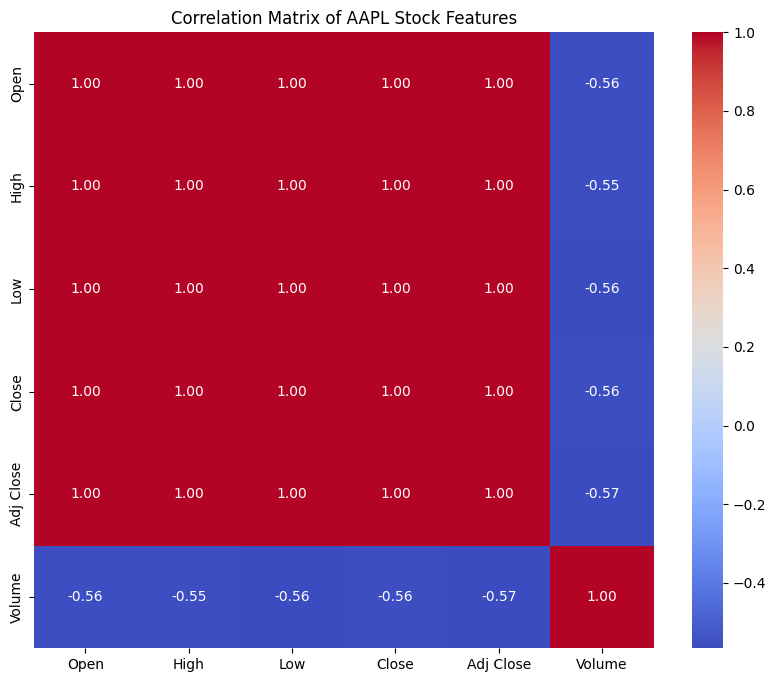

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of AAPL Stock Features')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Assuming 'Close' is the target variable and 'Open', 'High', 'Low', 'Volume' are features
X = df[['Open', 'High', 'Low', 'Volume']]  # Features
y = df['Close']  # Target variable

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [15]:
df = df.reset_index()
# Now you can safely convert and set the index
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # Ensure correct date format
df = df.set_index('Date')
df = df.asfreq("B")  # 'B' stands for business days, adjust as needed

In [16]:
# ARIMA Model
# Determine optimal (p,d,q) order using ACF and PACF plots (or other methods)
# Example: p=5, d=1, q=0 (replace with your optimal values)
model_arima = ARIMA(df['Close'], order=(5, 1, 0)) # Example order
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2085
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4373.461
Date:                Mon, 24 Mar 2025   AIC                           8758.922
Time:                        11:00:25   BIC                           8792.775
Sample:                    01-03-2012   HQIC                          8771.326
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0086      0.015      0.561      0.575      -0.021       0.039
ar.L2         -0.0533      0.017     -3.178      0.001      -0.086      -0.020
ar.L3         -0.0111      0.015     -0.722      0.4

In [17]:
#Make predictions
predictions_arima = model_arima_fit.predict(start=len(df) - 30, end=len(df) -1 )

In [18]:
#SARIMA Model
# Determine optimal (p,d,q)x(P,D,Q,s) order using ACF and PACF plots (or other methods)
# Example: order=(1, 1, 1), seasonal_order=(1, 1, 1, 12) (replace with your optimal values)
model_sarima = SARIMAX(df['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()

In [19]:
# Make predictions using SARIMA
predictions_sarima = model_sarima_fit.predict(start=len(df) - 30, end=len(df) - 1)

In [20]:
# Evaluate the model (example: RMSE)
# Remove NaN values before calculating RMSE
valid_indices = ~np.isnan(df['Close'][-30:]) & ~np.isnan(predictions_sarima)
rmse_sarima = np.sqrt(mean_squared_error(df['Close'][-30:][valid_indices], predictions_sarima[valid_indices]))
print(f"SARIMA RMSE: {rmse_sarima}")

SARIMA RMSE: 2.89079341463794


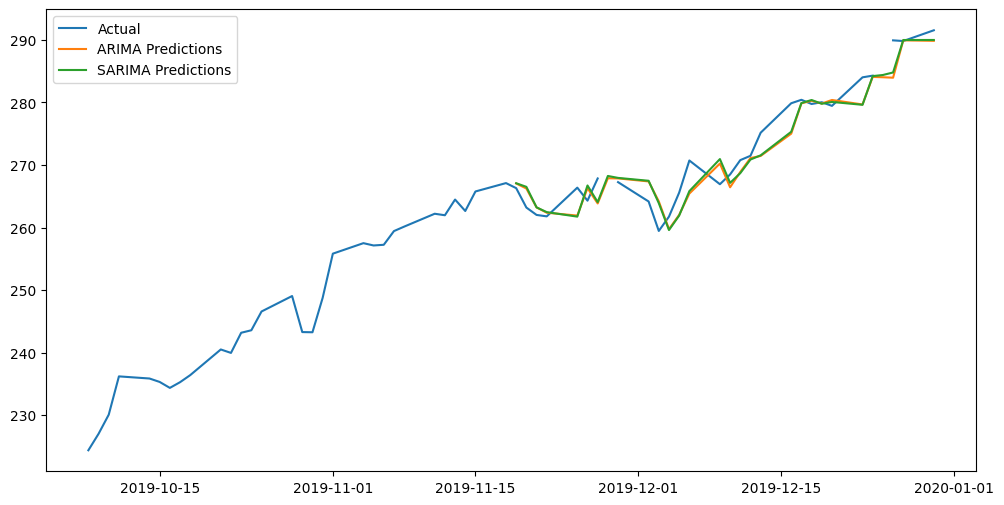

In [21]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df['Close'][-60:], label='Actual') #Plot last 60 days of data
plt.plot(predictions_arima, label='ARIMA Predictions')
plt.plot(predictions_sarima, label='SARIMA Predictions')
plt.legend()
plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [23]:
# Define parameter grids for hyperparameter tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

In [24]:
# Initialize models
rf_model = RandomForestRegressor(random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')

In [25]:
# Perform GridSearchCV for RandomForest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)
print("Best RandomForest parameters:", rf_grid_search.best_params_)
rf_best_model = rf_grid_search.best_estimator_
y_pred_rf = rf_best_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf}")

Best RandomForest parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest RMSE: 1.006962002601515


In [26]:
# Perform GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train, y_train)
print("Best XGBoost parameters:", xgb_grid_search.best_params_)
xgb_best_model = xgb_grid_search.best_estimator_
y_pred_xgb = xgb_best_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost RMSE: {rmse_xgb}")

Best XGBoost parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
XGBoost RMSE: 1.1699156101782582


In [27]:
# Evaluate the models
print(f"ARIMA AIC: {model_arima_fit.aic}")
print(f"SARIMA AIC: {model_sarima_fit.aic}")

# Calculate R-squared for ARIMA and SARIMA
# Remove NaN values before calculating R-squared
valid_indices_arima = ~np.isnan(df['Close'][-30:]) & ~np.isnan(predictions_arima)
r2_arima = r2_score(df['Close'][-30:][valid_indices_arima], predictions_arima[valid_indices_arima])

valid_indices_sarima = ~np.isnan(df['Close'][-30:]) & ~np.isnan(predictions_sarima)
r2_sarima = r2_score(df['Close'][-30:][valid_indices_sarima], predictions_sarima[valid_indices_sarima])

print(f"ARIMA R-squared: {r2_arima}")
print(f"SARIMA R-squared: {r2_sarima}")

#Calculate R-squared for RandomForest and XGBoost
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Random Forest R-squared: {r2_rf}")
print(f"XGBoost R-squared: {r2_xgb}")

ARIMA AIC: 8758.922403552637
SARIMA AIC: 8791.516152408298
ARIMA R-squared: 0.901451646016103
SARIMA R-squared: 0.9055809887298035
Random Forest R-squared: 0.9995975691731033
XGBoost R-squared: 0.999456782006747


In [28]:
import pickle
from sklearn.ensemble import RandomForestRegressor

# Example: Assume X_train, y_train are your training data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # Train the model

# ✅ Save the trained model
with open("rf_model.pkl", "wb") as file:
    pickle.dump(model, file)
